# Epsilon Data Science Hiring Challenge

This notebook is created w.r.t to the Data Science hiring challenge on Hackereath. This dataset constains actual online transactions from 2010 and 2011. This is a transactional dataset which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retai  The objectives of the challenge were:
- Perform the Time Series analysis on the sale of different products.
- Variation of the prices of goods according to the change in date and time.
- Correlation between unit price and quantity sold.
- Checking if description has any effect on the price or sale of goods.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns

# set random seed to get consistent results
np.random.seed(1)
% matplotlib notebook
sns.set_style('darkgrid')

# Data Preprocessing

Load the data from the csv file.
Note that the default 'utf-8' encoding will raise error.

In [2]:
data = pd.read_csv('data.csv', encoding='ISO-8859-1')
data.shape

(541909, 8)

In [3]:
data.head(7)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom


## Null Values

Checking for the null entries in the data we see that 'CutomerID' and 'Description' contains null values.

In [4]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
# filling the null entries with some value.

data.CustomerID.fillna(value='CustomerID NA', inplace=True)
data.Description.fillna(value='Not Available', inplace=True)
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [6]:
# separating the time from the datetime attribute

data['InvoiceTime'] = data.InvoiceDate.apply(lambda x:x.split()[-1])

In [7]:
# separate the date, month and year from datetime. This will help us in visualization.
def assign_month(num):
    month = { 1: 'Jan', 2: 'Feb', 3: 'Mar', 4:'Apr', 5: 'May', 6:'Jun', 
              7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
    return month[int(num)]


data['InvoiceYear'] = data.InvoiceDate.apply(lambda x: x.split()[0].split('/')[-1])
data['InvoiceMonth'] = data.InvoiceDate.apply(lambda x: assign_month(x.split()[0].split('/')[0]))
data['InvoiceDate'] = data.InvoiceDate.apply(lambda x: x.split()[0].split('/')[-2])

In [8]:
data['TotalPrice'] = data.Quantity * data.UnitPrice

In [9]:
# let's rearrage the columns to get a neat view

data = data[['InvoiceNo', 'InvoiceTime', 'InvoiceDate', 'InvoiceMonth', 'InvoiceYear',
             'StockCode', 'CustomerID', 'Description', 'Quantity', 'UnitPrice', 'TotalPrice', 'Country']]

In [10]:
data.head()

,InvoiceNo,InvoiceTime,InvoiceDate,InvoiceMonth,InvoiceYear,StockCode,CustomerID,Description,Quantity,UnitPrice,TotalPrice,Country
0,536365,8:26,1,Dec,2010,85123A,17850,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,United Kingdom
1,536365,8:26,1,Dec,2010,71053,17850,WHITE METAL LANTERN,6,3.39,20.34,United Kingdom
2,536365,8:26,1,Dec,2010,84406B,17850,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,United Kingdom
3,536365,8:26,1,Dec,2010,84029G,17850,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,United Kingdom
4,536365,8:26,1,Dec,2010,84029E,17850,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,United Kingdom


# Visualization

In [11]:
def year_wise_price(year):
    x = data[['InvoiceYear', 'TotalPrice']]
    x = x[x['InvoiceYear'] == year]
    s = np.sum(x.TotalPrice)
    del x
    return s

years =['2010', '2011']

year_prices = []
for m in years:
    year_prices.append(year_wise_price(m)/10000)

In [12]:
# function to annotate values on the bars in barplot

def annotate(ax):
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('%d' %(y), (x.mean(), y), ha='center', va='bottom')

## Year wise analysis

<IPython.core.display.Javascript object>


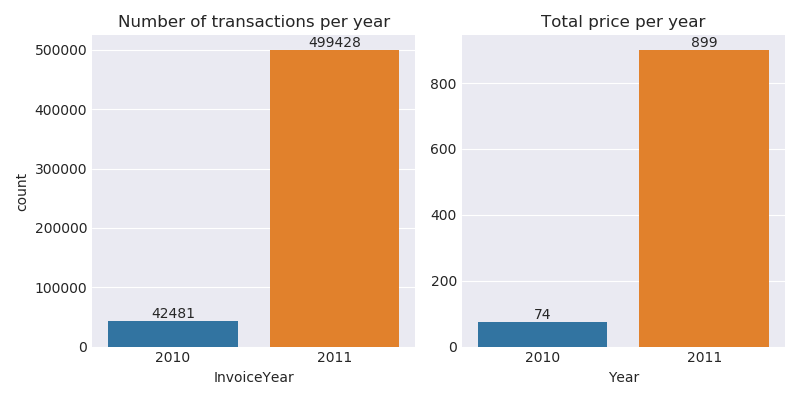

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

sns.countplot(x='InvoiceYear', data=data, ax=ax[0])
ax[0].set_title('Number of transactions per year')
annotate(ax[0])

sns.barplot(years, year_prices, ax=ax[1])
annotate(ax[1])
plt.title('Total price per year')
ax[1].set_xlabel('Year')

plt.tight_layout()

In [14]:
def country_wise_price(country):
    x = data[data['Country'] == country]
    x2010 = x[x.InvoiceYear == '2010']
    x2011 = x[x.InvoiceYear == '2011']
    s2010 = np.sum(x2010.TotalPrice)
    s2011 = np.sum(x2011.TotalPrice)
    del x
    del x2010
    del x2011
    return s2010, s2011

countries = np.unique(data.Country)

country_prices = pd.DataFrame([])
for c in countries:
    s2010, s2011 = country_wise_price(c)
    row = pd.DataFrame({'Country': [c], 'SumPrice_in_2010': [s2010], 'SumPrice_in_2011': [s2011], 'TotalPrice': s2010+s2011})
    country_prices = country_prices.append(row)
    
country_prices = country_prices.sort_values(by=['TotalPrice'], ascending=False)
country_prices.to_csv('Country_wise_prices.csv', index=False)
country_prices

,Country,SumPrice_in_2010,SumPrice_in_2011,TotalPrice
0,United Kingdom,676742.62,7.511064e+06,8.187806e+06
0,Netherlands,8784.48,2.758771e+05,2.846615e+05
0,EIRE,9029.95,2.542469e+05,2.632768e+05
0,Germany,14562.84,2.071354e+05,2.216982e+05
0,France,9575.36,1.878285e+05,1.974039e+05
0,Australia,1005.10,1.360722e+05,1.370773e+05
0,Switzerland,1304.92,5.508043e+04,5.638535e+04
0,Spain,1843.73,5.293085e+04,5.477458e+04
0,Belgium,1809.91,3.910105e+04,4.091096e+04
0,Sweden,2646.30,3.394961e+04,3.659591e+04


### BarPlot
The bar plot below represents an estimate of central tendency for a price with the height of each rectangle and provides some indication of the uncertainty around that estimate using error bars.

<IPython.core.display.Javascript object>


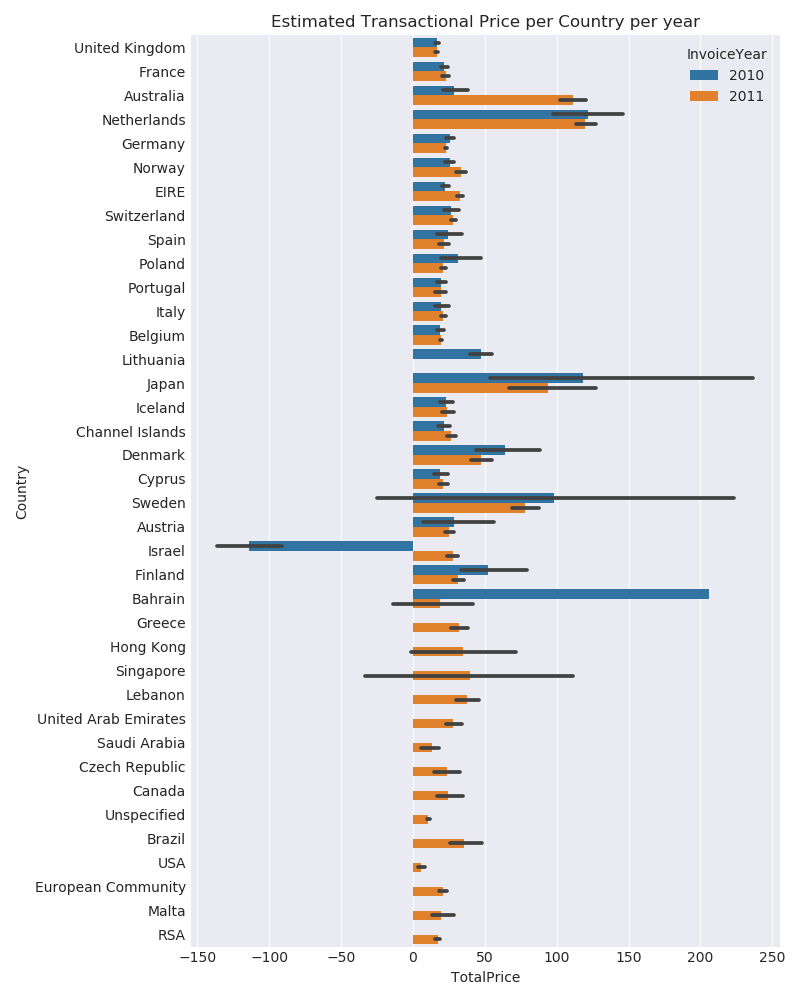

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 10))

sns.barplot(x='TotalPrice', y='Country', hue='InvoiceYear', data=data, ax=ax, estimator=np.mean)
ax.set_title("Estimated Transactional Price per Country per year")
plt.tight_layout()

## Points to infer:

- Among the 37 countries (1 unspecified), United Kingdom is the country with maximum cummulative price of transactions. Whereas Saudi Arabia has the lowest.
- We can clearly see in the csv file that among all the countries, Israel is the only country whose cummulative price of the transactions(in year 2010) is negative which could mean that Israel was more a supplier of goods rather than a consumer. 
- Countries like Greece, HongKong, Singapore, Lebanon etc. have all of the transactions performed only in the year 2011.

## Monthly Analysis

<IPython.core.display.Javascript object>


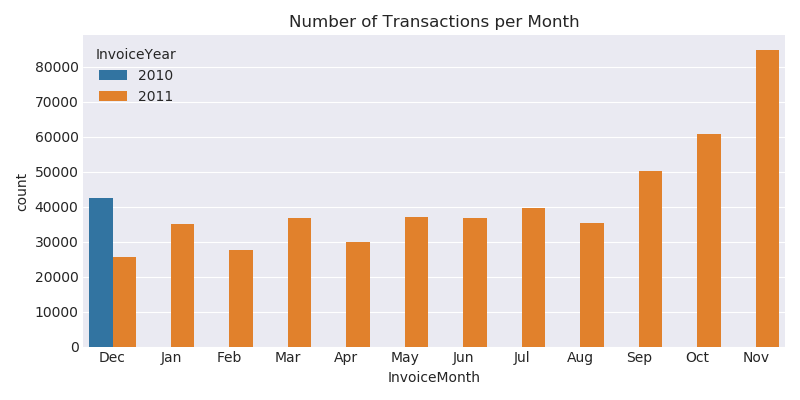

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))

sns.countplot(x='InvoiceMonth', data=data, ax=ax, hue='InvoiceYear')
ax.set_title("Number of Transactions per Month")
#annotate(ax)
plt.tight_layout()

In [17]:
def month_wise_price(month):
    x = data[data['InvoiceMonth'] == month]
    x2010 = x[x.InvoiceYear == '2010']
    x2011 = x[x.InvoiceYear == '2011']
    s2010 = np.sum(x2010.TotalPrice)
    s2011 = np.sum(x2011.TotalPrice)
    del x
    del x2010
    del x2011
    return s2010, s2011

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

month_prices = pd.DataFrame([])
for m in months:
    s2010, s2011 = month_wise_price(m)
    row = pd.DataFrame({'Month': [m], 'SumPrice_in_2010': [s2010], 'SumPrice_in_2011': [s2011], 'TotalPrice': s2010+s2011})
    month_prices = month_prices.append(row)


month_prices.to_csv('Month_wise_sum_prices.csv', index=False)
month_prices

,Month,SumPrice_in_2010,SumPrice_in_2011,TotalPrice
0,Jan,0.00,560000.260,560000.260
0,Feb,0.00,498062.650,498062.650
0,Mar,0.00,683267.080,683267.080
0,Apr,0.00,493207.121,493207.121
0,May,0.00,723333.510,723333.510
0,Jun,0.00,691123.120,691123.120
0,Jul,0.00,681300.111,681300.111
0,Aug,0.00,682680.510,682680.510
0,Sep,0.00,1019687.622,1019687.622
0,Oct,0.00,1070704.670,1070704.670


<IPython.core.display.Javascript object>


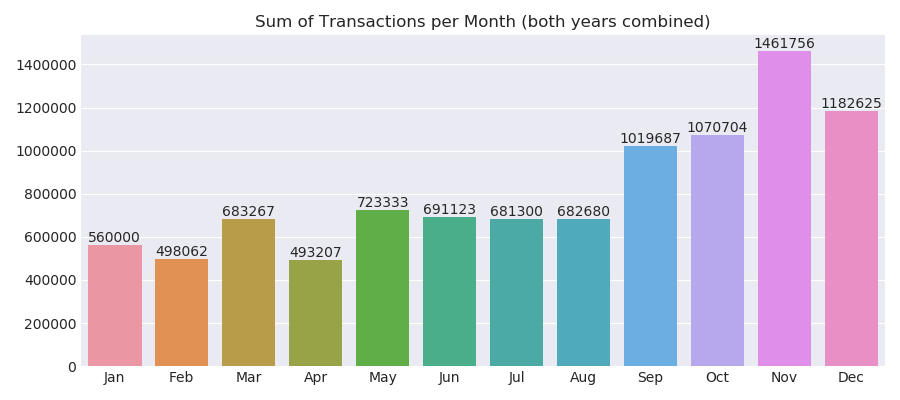

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 4))

sns.barplot(x=months, y=month_prices.TotalPrice.values, ax=ax)
ax.set_title("Sum of Transactions per Month (both years combined)")
annotate(ax)
plt.tight_layout()

# Correlation between unit price and quantity sold

In [19]:
from scipy.stats import pearsonr
corr_coeff = pearsonr(data['Quantity'].values, data['UnitPrice'].values)
print('2-tailed p-value =', corr_coeff)

2-tailed p-value = (-0.0012349245448702931, 0.36330716414247788)


<IPython.core.display.Javascript object>


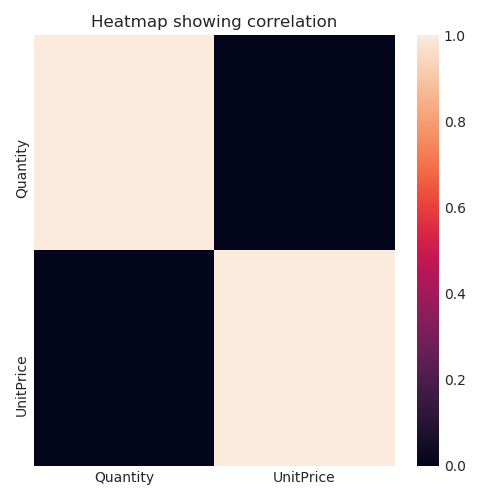

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

sns.heatmap(data=data[['Quantity', 'UnitPrice']].corr(), ax=ax)
ax.set_title("Heatmap showing correlation")
plt.tight_layout()

### Point to infer

We see that there is no correlation between Unit price and the quantity of the goods according to the Pearson'r correlation coefficient.

## Does description have any effect on the price ??

In [21]:
print('Total number of unique desciptions =', len(np.unique(data.Description)))

Total number of unique desciptions = 4224


The below cell will take sometime to run.

In [22]:
def description_wise_price(description):
    x = data[data['Description'] == description]
    x2010 = x[x.InvoiceYear == '2010']
    x2011 = x[x.InvoiceYear == '2011']
    s2010 = np.sum(x2010.TotalPrice)
    s2011 = np.sum(x2011.TotalPrice)
    del x
    del x2010
    del x2011
    return s2010, s2011

descriptions = np.unique(data.Description)

description_prices = pd.DataFrame([])

for d in descriptions:
    s2010, s2011 = description_wise_price(d)
    row = pd.DataFrame({'Description': [d], 'SumPrice_in_2010': [s2010], 'SumPrice_in_2011': [s2011], 'TotalPrice': s2010+s2011})
    description_prices = description_prices.append(row)

In [24]:
description_prices = description_prices.sort_values(by=['TotalPrice'], ascending=False)
description_prices.to_csv('Description_wise_prices.csv', index=False)

In [25]:
description_prices.head()

,Description,SumPrice_in_2010,SumPrice_in_2011,TotalPrice
0,DOTCOM POSTAGE,24671.19,181574.29,206245.48
0,REGENCY CAKESTAND 3 TIER,26897.36,137864.83,164762.19
0,WHITE HANGING HEART T-LIGHT HOLDER,9877.82,89790.65,99668.47
0,PARTY BUNTING,1207.74,97095.24,98302.98
0,JUMBO BAG RED RETROSPOT,3972.35,88383.68,92356.03


In [30]:
print('Highest transaction in', description_prices.iloc[0]['Description'], "=",description_prices.iloc[0]['TotalPrice'])
print('Lowest transaction in', description_prices.iloc[-1]['Description'], "=",description_prices.iloc[-1]['TotalPrice'])

Highest transaction in DOTCOM POSTAGE = 206245.48
Lowest transaction in AMAZON FEE = -221520.5


## Points to infer
- The overall prices of the goods have increased from year 2010 to 2011.
- DOTCOM POSTAGE has highest cummulative price whereas AMAZON FEE has lowest.